### Introduction

Just as it is with traditional sports, the collection, analysis, and use of all kinds of data is 
starting to change the way that competitive games are played and understood. Nowadays, as 
the E-sports become increasingly popular, data analyses on E-sports games are also 
rising in popularity and demand. Because of the foundations of multiple commercial E-sport
Leagues, data analyses is playing a signifificant role, just like the role they play in NBA and 
other sport leagues.

Data analysis can help improve matchmaking algorithms and game balance to the benefit of everyone that plays.

League of Legends around the world. In this project, the online game League of Legends (LoL), developed by 
Riot Games in 2009, will be the case study.

In the most popular game mode, Summoners Rift, two teams (Red and Blue) of 5 champions spawn into a map in their respective bases. The goal is to “take over” the enemy team's base by destroying a nexus, which can only be done after destroying towers and other objectives guarding the base.

The players usually separate into three lanes top, middle and bottom to gain gold and gear up. In the middle of the lanes are the jungle that contain more monsters and other global objectives that give your team power ups in the form of gold or stats. 

Identifying the most important objectives is the goal of this analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Create functions to load our data and save file names in variables**

In [2]:
filename = 'games.csv'
def load_data(file):
    return pd.read_csv(file)

In [3]:
games_full = load_data(filename)

# Exploratory data analysis



In [4]:
games_full.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


**This data set contains 61 features in which one feature displays the winning team. The data is for season 9.** 

**In general, objectives are extremely important for winning a game of League of Legends. It enables one to advance closer to the enemy base and into their jungle. A player can plant deeper wards to gain vision for their entire team and global objectives provide either gold or power ups for the entire team.**

**Before feature selection and engineering we need to see if there are any missing values**

In [5]:
games_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameId              51490 non-null  int64
 1   creationTime        51490 non-null  int64
 2   gameDuration        51490 non-null  int64
 3   seasonId            51490 non-null  int64
 4   winner              51490 non-null  int64
 5   firstBlood          51490 non-null  int64
 6   firstTower          51490 non-null  int64
 7   firstInhibitor      51490 non-null  int64
 8   firstBaron          51490 non-null  int64
 9   firstDragon         51490 non-null  int64
 10  firstRiftHerald     51490 non-null  int64
 11  t1_champ1id         51490 non-null  int64
 12  t1_champ1_sum1      51490 non-null  int64
 13  t1_champ1_sum2      51490 non-null  int64
 14  t1_champ2id         51490 non-null  int64
 15  t1_champ2_sum1      51490 non-null  int64
 16  t1_champ2_sum2      51490 non-null  int6

In [43]:
games_full.isnull().sum()

gameId          0
creationTime    0
gameDuration    0
seasonId        0
winner          0
               ..
t2_ban1         0
t2_ban2         0
t2_ban3         0
t2_ban4         0
t2_ban5         0
Length: 61, dtype: int64

**The data set does not contain any missing values and all columns contain integers. This is pretty fortunate because we don't have to encode any categorical values. However we could turn some columns into categorical data and then encode it later. For example, instead of having 5 separate columns for champion picks on each team, we could aggregate them into a column called Meta. Whether the team consisted of meta champions for that season.**

In [6]:
games_full.describe()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
count,5.149000e+04,5.149000e+04,51490.000000,51490.0,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,...,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,3.306223e+09,1.502926e+12,1832.362808,9.0,1.493552,1.471295,1.450631,1.308487,0.926510,1.442804,...,5.549466,0.985084,0.414547,1.404370,0.240105,108.216294,107.910216,108.690581,108.626044,108.066576
std,2.946096e+07,1.978026e+09,512.017696,0.0,0.499963,0.520326,0.542848,0.676097,0.841424,0.569579,...,3.860989,1.256284,0.613768,1.224492,0.427151,102.551787,102.870710,102.592145,103.346952,102.756149
min,3.214824e+09,1.496892e+12,190.000000,9.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.292218e+09,1.502021e+12,1531.000000,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,38.000000,37.000000,38.000000,38.000000,38.000000
50%,3.320021e+09,1.503844e+12,1833.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,1.000000,0.000000,90.000000,90.000000,90.000000,90.000000,90.000000
75%,3.327099e+09,1.504352e+12,2148.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,2.000000,1.000000,2.000000,0.000000,141.000000,141.000000,141.000000,141.000000,141.000000
max,3.331833e+09,1.504707e+12,4728.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,10.000000,4.000000,6.000000,1.000000,516.000000,516.000000,516.000000,516.000000,516.000000


In [7]:
games_full['winner'].value_counts()

1    26077
2    25413
Name: winner, dtype: int64

**Team 1 won 50.56% of the games and team 2 won 49.44% of the games. It's going to be hard to determine why each team won their game when these numbers are so close. Maybe there was a determinant factor that lead to these games being won?**

**Some important milestones are first blood,first dragon,first tower, first baron, first inhibitor. These are important factors in winning games**

In [8]:
games_full['firstBlood'].value_counts()

1    26113
2    24822
0      555
Name: firstBlood, dtype: int64

**388 games had no first blood meaning there were some early surrenders/remakes. Team 1 has more first bloods than wins, which means they got first blood some games but still ended up losing.**

In [11]:
games_full['firstTower'].value_counts()

1    25861
2    24416
0     1213
Name: firstTower, dtype: int64

**It seems that there is a high correlation between first towers and winning a game. However, even though a team took the first tower that does not mean they won. There are so many other factors that should be considered.**

In [10]:
games_full['firstDragon'].value_counts()

2    24800
1    24690
0     2000
Name: firstDragon, dtype: int64

In [12]:
games_full['firstBaron'].value_counts()

0    20258
2    16474
1    14758
Name: firstBaron, dtype: int64

In [13]:
games_full['firstInhibitor'].value_counts()

1    23054
2    22160
0     6276
Name: firstInhibitor, dtype: int64

<AxesSubplot:xlabel='firstDragon', ylabel='count'>

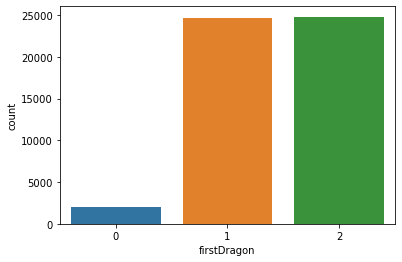

In [14]:
sns.countplot(x='firstDragon',data=games_full)

<AxesSubplot:xlabel='winner', ylabel='count'>

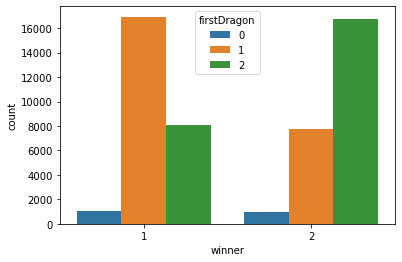

In [15]:
sns.countplot(x='winner',data=games_full,hue='firstDragon')

<AxesSubplot:xlabel='winner', ylabel='count'>

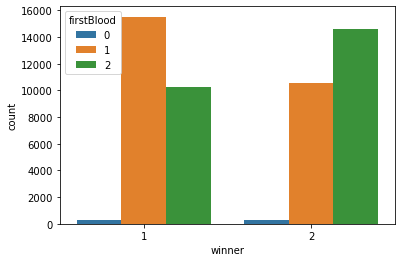

In [16]:
sns.countplot(x='winner',data=games_full,hue='firstBlood')

<AxesSubplot:xlabel='winner', ylabel='count'>

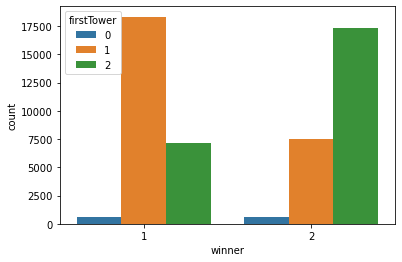

In [17]:
sns.countplot(x='winner',data=games_full,hue='firstTower')

<AxesSubplot:xlabel='winner', ylabel='count'>

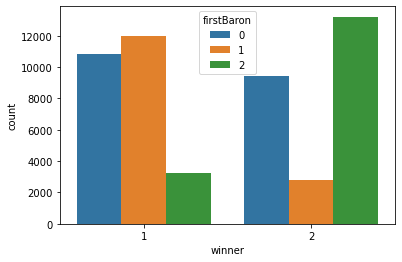

In [18]:
sns.countplot(x='winner',data=games_full,hue='firstBaron')

<AxesSubplot:xlabel='winner', ylabel='count'>

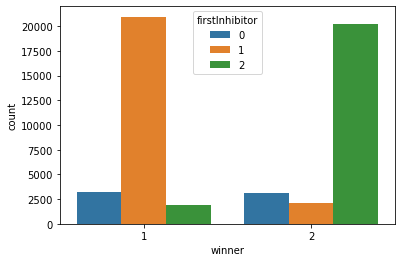

In [19]:
sns.countplot(x='winner',data=games_full,hue='firstInhibitor')

# Comparing these different features:

1. These features all highly correlate with what team won that game. 
2. It seems like global objectives such as towers,dragons, and an extremely high correlation between first inhibitor and winning a game. 
3. First baron does not seem as important but we should take into consideration the length of these games as well. Baron does not spawn until 20 minutes into the game.

In [28]:
corr_matrix = games_full.corr()

In [29]:
corr_matrix['winner'].sort_values(ascending=False)

winner               1.000000
t2_towerKills        0.785813
t2_inhibitorKills    0.660452
firstInhibitor       0.536437
t2_dragonKills       0.497206
                       ...   
t1_baronKills       -0.369472
t1_dragonKills      -0.472483
t1_inhibitorKills   -0.649405
t1_towerKills       -0.771541
seasonId                  NaN
Name: winner, Length: 61, dtype: float64

<AxesSubplot:xlabel='t2_towerKills', ylabel='count'>

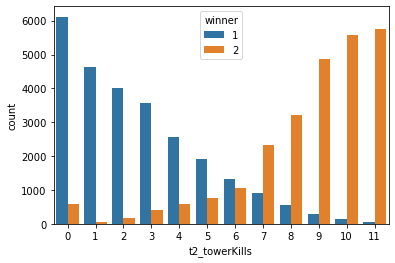

In [30]:
sns.countplot(x='t2_towerKills',data=games_full,hue='winner')

<AxesSubplot:xlabel='t1_towerKills', ylabel='count'>

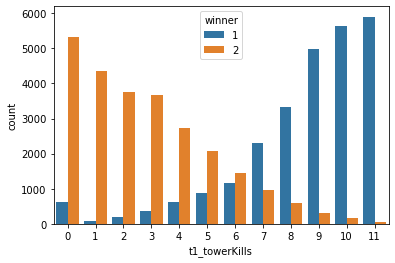

In [31]:
sns.countplot(x='t1_towerKills',data=games_full,hue='winner')

In [32]:
sum_157_1 = 0
sum_157_2 = 0
for i in range(1,3):
    for j in range(1,6):
        if i == 1:
            sum_157_1 += games_full[games_full['t' + str(i) + '_ban' + str(j)] == 157]['t' + str(i) + '_ban' + str(j)].value_counts()
        else:
            sum_157_2 += games_full[games_full['t' + str(i) + '_ban' + str(j)] == 157]['t' + str(i) + '_ban' + str(j)].value_counts()

print('Team 1 banned 157 %s times.' % str(sum_157_1))
print('Team 2 banned 157 %s times.' % str(sum_157_2))


Team 1 banned 157 157    16618
Name: t1_ban1, dtype: int64 times.
Team 2 banned 157 157    16397
Name: t2_ban1, dtype: int64 times.


In [33]:
games_full['gameDuration']=games_full['gameDuration'].apply(lambda x: x/60)

<AxesSubplot:>

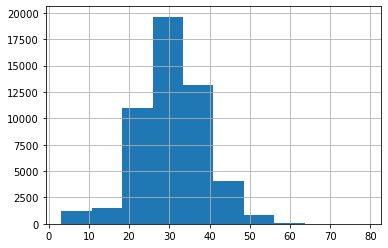

In [34]:
games_full['gameDuration'].hist()

In [35]:
tower = games_full[['firstInhibitor','winner']]

In [36]:
winner_1 = 18223
winner_2 = 17820

In [37]:
(tower[games_full['firstInhibitor']==1][games_full['winner']==1].sum()['winner']/winner_1) * 100

114.95911759863908

In [38]:
def calc_win_percent(team,feature,data,winner):
    win = data[[feature,'winner']]
    if team == 1:
        win = (win[data[feature] == team][data['winner']==team].sum()['winner']/winner) * 100
    else:
        win = ((win[data[feature] == team][data['winner']==team].sum()/2)['winner']/winner) * 100
    return win

In [39]:
first_tower_win_1 = calc_win_percent(1,'firstTower',games_full,winner_1)

In [40]:
first_features = []
features = ['firstTower','firstBlood','firstInhibitor','firstDragon','firstBaron']
firstTower_win1 = calc_win_percent(1,'firstTower',games_full,winner_1)
first_features.append(firstTower_win1)

firstTower_win2 = calc_win_percent(2,'firstTower',games_full,winner_2)
first_features.append(firstTower_win2)

firstBlood_win1 = calc_win_percent(1,'firstBlood',games_full,winner_1)
first_features.append(firstBlood_win1)

firstBlood_win2= calc_win_percent(2,'firstBlood',games_full,winner_2)
first_features.append(firstBlood_win2)

firstInhib_win1 = calc_win_percent(1,'firstInhibitor',games_full,winner_1)
first_features.append(firstInhib_win1)

firstInhib_win2 = calc_win_percent(2,'firstInhibitor',games_full,winner_2)
first_features.append(firstInhib_win2)

firstDragon_win1 = calc_win_percent(1,'firstDragon',games_full,winner_1)
first_features.append(firstDragon_win1)

firstDragon_win2 = calc_win_percent(2,'firstDragon',games_full,winner_2)
first_features.append(firstDragon_win2)

firstBaron_win1 = calc_win_percent(1,'firstBaron',games_full,winner_1)
first_features.append(firstBaron_win1)

firstBaron_win2 = calc_win_percent(2,'firstBaron',games_full,winner_2)
first_features.append(firstBaron_win2)


In [41]:
i =0
while i < len(features):
    print('%s:' % features[i])
    
    print('Team 1 - %s win rate '% first_features[2*i])
    print('Team 2- %s win rate ' % first_features[2*i+1])
    i += 1

firstTower:
Team 1 - 100.53229435328981 win rate 
Team 2- 97.00897867564534 win rate 
firstBlood:
Team 1 - 85.23294737419744 win rate 
Team 2- 81.79012345679013 win rate 
firstInhibitor:
Team 1 - 114.95911759863908 win rate 
Team 2- 113.59147025813692 win rate 
firstDragon:
Team 1 - 92.94298414092081 win rate 
Team 2- 93.89450056116722 win rate 
firstBaron:
Team 1 - 65.73012127531142 win rate 
Team 2- 74.18069584736251 win rate 


In [42]:
team =[1,2]

first_team = [first_features[i] for i in range(0,9,2)]
second_team = [first_features[i] for i in range(1,10,2)]

In [36]:
win_probability = pd.DataFrame([first_team,second_team],columns=features,index=[team]).reset_index()

In [37]:
win_probability=win_probability.rename(columns={'level_0':'winner'})

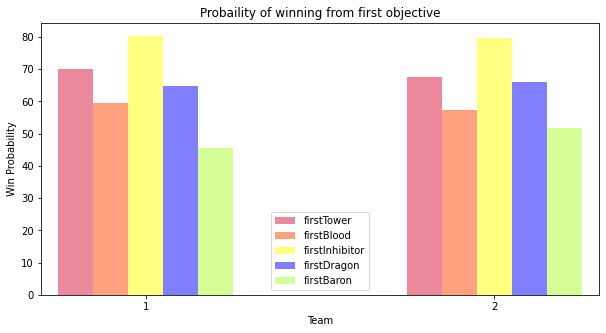

In [38]:
pos = list(range(len(win_probability['winner'])))
width = 0.10

#plotting the bars
fig,ax= plt.subplots(figsize=(10,5))

#create a bar with firstblood data, in position pos

plt.bar(pos,
       win_probability['firstTower'],
       width,
       alpha=0.5,
       color ='#DC143C',
       label=win_probability.columns[1])

plt.bar([p + width for p in pos],
       win_probability['firstBlood'],
       width,
       alpha=0.5,
       color ='#FF4500',
       label=win_probability.columns[2])

plt.bar([p + width*2 for p in pos],
       win_probability['firstInhibitor'],
       width,
       alpha=0.5,
       color ='#FFFF00',
       label=win_probability.columns[3])

plt.bar([p + width*3 for p in pos],
       win_probability['firstDragon'],
       width,
       alpha=0.5,
       color ='#0000FF',
       label=win_probability.columns[4])

plt.bar([p + width*4 for p in pos],
       win_probability['firstBaron'],
       width,
       alpha=0.5,
       color ='#ADFF2F',
       label=win_probability.columns[5])

plt.xlim(min(pos)-width, max(pos)+width*5)
ax.set_ylabel('Win Probability')
ax.set_xlabel('Team')
ax.set_title('Probaility of winning from first objective')
ax.set_xticks([p + 2 * width for p in pos])
ax.set_xticklabels(win_probability['winner'])
plt.legend()

# Features:

We analyze some features to understand which has the potential to impact winning a game. So far it seems that when a team took the first tower, inhibitor or dragon they had the highest chance of winning while taking first blood and baron were not as important. 

I want to see what was the average amount of towers, inhibitors, dragons and barons for each team when they won.
Then I want to see if the champ select/ban phase impacted the win rate.

In [25]:
games_full.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [24]:
study = ['t1_towerKills','t1_inhibitorKills','t1_baronKills','t1_dragonKills','t1_riftHeraldKills','t2_towerKills','t2_inhibitorKills','t2_baronKills','t2_dragonKills','t2_riftHeraldKills']
games_full.groupby('winner')[study].mean()

,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
winner,,,,,,,,,,
1,8.593473,1.827818,0.585267,1.950071,0.344863,2.554358,0.166008,0.172643,0.803352,0.144764
2,2.729627,0.186086,0.153740,0.809586,0.155629,8.622831,1.825562,0.662771,2.021092,0.337937


<AxesSubplot:xlabel='t1_towerKills', ylabel='count'>

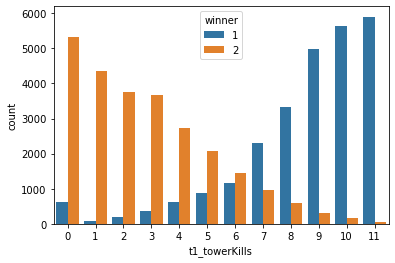

In [23]:
sns.countplot(x='t1_towerKills',data=games_full,hue='winner')

<AxesSubplot:xlabel='t2_towerKills', ylabel='count'>

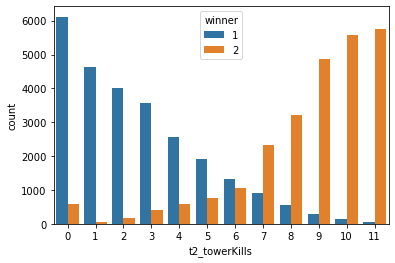

In [22]:
sns.countplot(x='t2_towerKills',data=games_full,hue='winner')

**Let's now check the data on champion info, which involves team compositions and banned champions.**z

**What I am most curious about is the most played champion, the champion that had the highest win rate and the highest banned champion.**

In [21]:
games_full.groupby(['t1_ban1'])['seasonId'].value_counts().sort_values(ascending=False)

t1_ban1  seasonId
157      9           3403
238      9           2511
31       9           2460
122      9           2319
40       9           2083
                     ... 
101      9             11
30       9             11
78       9              9
13       9              8
72       9              7
Name: seasonId, Length: 139, dtype: int64

In [20]:
games_full.groupby(['t2_ban1'])['seasonId'].value_counts().sort_values(ascending=False)

t2_ban1  seasonId
157      9           3307
238      9           2544
31       9           2538
40       9           2308
122      9           2274
                     ... 
106      9             13
13       9             10
14       9             10
72       9              8
77       9              6
Name: seasonId, Length: 139, dtype: int64

**Right off the bat the top 11 champions who were banned the in the first pick out of our 36043 games are shared between team 1 and 2. This means that in any games they are most likely banned entirely.**

##### Combining the coloumns into 'Team1' and 'Team2' columns for better assessment of champion data

In [45]:
"""Creating dataframe 'total_team by selecting columns to aggregate, 
and then addding 2 columns Team_1 and Team_2, to contain team composition and winner"""

team_comp= ['winner','t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id','t2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id']
total_team = games_full[team_comp]


In [46]:

total_team['Team_1'] = 0
total_team['Team_2'] = 0

##### Creating a function to take in a dataframe as argument. It converts team columns into object data types and loops over each row,slices information containing champions converts it to a list and pushses it to the respective team column.


In [47]:

def aggregate_columns(dataframe):
    dataframe.reset_index(drop=True,inplace=True)
    dataframe['Team_1'] = dataframe['Team_1'].astype(object)
    dataframe['Team_2'] = dataframe['Team_2'].astype(object)
    for index in dataframe.index:
        Team=dataframe.loc[index][1:6].tolist()
        dataframe.at[index,'Team_1'] = Team
        Team2=dataframe.loc[index][6:11].tolist()
        dataframe.at[index,'Team_2'] = Team2
    return dataframe

In [48]:
total_team = aggregate_columns(total_team)

In [49]:
total_team.head()

,winner,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id,Team_1,Team_2
0,1,121,119,236,497,75,22,54,61,40,107,"[121, 119, 236, 497, 75]","[22, 54, 61, 40, 107]"
1,1,134,22,59,17,37,429,117,64,86,61,"[134, 22, 59, 17, 37]","[429, 117, 64, 86, 61]"
2,2,131,75,141,53,67,19,412,96,27,112,"[131, 75, 141, 53, 67]","[19, 412, 96, 27, 112]"
3,2,412,42,41,134,141,22,53,19,164,20,"[412, 42, 41, 134, 141]","[22, 53, 19, 164, 20]"
4,2,21,40,19,1,92,101,36,44,80,29,"[21, 40, 19, 1, 92]","[101, 36, 44, 80, 29]"


In [50]:
drop = team_comp= ['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id','t2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id']
total_team.drop(drop,axis=1,inplace=True)

In [51]:
total_team

,winner,Team_1,Team_2
0,1,"[121, 119, 236, 497, 75]","[22, 54, 61, 40, 107]"
1,1,"[134, 22, 59, 17, 37]","[429, 117, 64, 86, 61]"
2,2,"[131, 75, 141, 53, 67]","[19, 412, 96, 27, 112]"
3,2,"[412, 42, 41, 134, 141]","[22, 53, 19, 164, 20]"
4,2,"[21, 40, 19, 1, 92]","[101, 36, 44, 80, 29]"
...,...,...,...
36038,1,"[20, 126, 7, 119, 40]","[121, 412, 79, 238, 22]"
36039,2,"[3, 110, 121, 67, 412]","[37, 45, 236, 24, 131]"
36040,2,"[268, 150, 5, 498, 497]","[16, 202, 79, 141, 85]"
36041,1,"[113, 429, 105, 117, 24]","[111, 103, 59, 240, 119]"


The champions(represented by their ids) for each team can be seen along with winning team number.

Function is to loop over the teams and record the counts of every champion.

In [52]:
def count_instances(df,d):
    teams =[1,2]
    for team in teams:
        for games in df.index:
            for champion in df.loc[games][team]:
                if str(champion) in d:
                    d[str(champion)]['picked'] +=1
                    if df.loc[games][0] == team:
                        d[str(champion)]['won'] +=1
                else:
                    d[str(champion)] = {'picked':0,'won':0}
                    d[str(champion)]['picked'] =1
                    if df.loc[games][0] == team:
                        d[str(champion)]['won'] =1
    return d

Creating champion dictionary

In [54]:
champion_dict = {}
champion_dict = count_instances(total_team,champion_dict)

In [55]:
champion_dict

{'121': {'picked': 3069, 'won': 1481},
 '119': {'picked': 3488, 'won': 1731},
 '236': {'picked': 5780, 'won': 2713},
 '497': {'picked': 4820, 'won': 2468},
 '75': {'picked': 3054, 'won': 1577},
 '134': {'picked': 2646, 'won': 1236},
 '22': {'picked': 3808, 'won': 1817},
 '59': {'picked': 4236, 'won': 2227},
 '17': {'picked': 2884, 'won': 1491},
 '37': {'picked': 3733, 'won': 2015},
 '131': {'picked': 2163, 'won': 1120},
 '141': {'picked': 6843, 'won': 3405},
 '53': {'picked': 4770, 'won': 2450},
 '67': {'picked': 7503, 'won': 3885},
 '412': {'picked': 9110, 'won': 4311},
 '42': {'picked': 1728, 'won': 807},
 '41': {'picked': 2936, 'won': 1450},
 '21': {'picked': 4275, 'won': 2262},
 '40': {'picked': 6097, 'won': 3352},
 '19': {'picked': 4123, 'won': 2116},
 '1': {'picked': 2309, 'won': 1164},
 '92': {'picked': 4321, 'won': 2158},
 '78': {'picked': 1273, 'won': 575},
 '16': {'picked': 4287, 'won': 2259},
 '54': {'picked': 1735, 'won': 867},
 '161': {'picked': 2215, 'won': 1136},
 '32': 

Each champion id is stored as a string and the corresponding picked rate and win rate are stored for each champion

Creating the function to convert the numbers to win percentages to better understand the win rate

In [56]:
def win_percent(data):
    for champion in data:
        data[champion]['won'] =  (data[champion]['won']/data[champion]['picked']) * 100
    return data

In [57]:
champion_dict = win_percent(champion_dict)

In [58]:
champion_dict

{'121': {'picked': 3069, 'won': 48.256761159986965},
 '119': {'picked': 3488, 'won': 49.62729357798165},
 '236': {'picked': 5780, 'won': 46.937716262975776},
 '497': {'picked': 4820, 'won': 51.203319502074685},
 '75': {'picked': 3054, 'won': 51.637197118533074},
 '134': {'picked': 2646, 'won': 46.71201814058957},
 '22': {'picked': 3808, 'won': 47.715336134453786},
 '59': {'picked': 4236, 'won': 52.5731822474032},
 '17': {'picked': 2884, 'won': 51.69902912621359},
 '37': {'picked': 3733, 'won': 53.97803375301366},
 '131': {'picked': 2163, 'won': 51.7799352750809},
 '141': {'picked': 6843, 'won': 49.75887768522578},
 '53': {'picked': 4770, 'won': 51.36268343815513},
 '67': {'picked': 7503, 'won': 51.77928828468612},
 '412': {'picked': 9110, 'won': 47.321624588364436},
 '42': {'picked': 1728, 'won': 46.70138888888889},
 '41': {'picked': 2936, 'won': 49.38692098092643},
 '21': {'picked': 4275, 'won': 52.91228070175439},
 '40': {'picked': 6097, 'won': 54.97785796293259},
 '19': {'picked': 4

In [59]:
champion_dict

{'121': {'picked': 3069, 'won': 48.256761159986965},
 '119': {'picked': 3488, 'won': 49.62729357798165},
 '236': {'picked': 5780, 'won': 46.937716262975776},
 '497': {'picked': 4820, 'won': 51.203319502074685},
 '75': {'picked': 3054, 'won': 51.637197118533074},
 '134': {'picked': 2646, 'won': 46.71201814058957},
 '22': {'picked': 3808, 'won': 47.715336134453786},
 '59': {'picked': 4236, 'won': 52.5731822474032},
 '17': {'picked': 2884, 'won': 51.69902912621359},
 '37': {'picked': 3733, 'won': 53.97803375301366},
 '131': {'picked': 2163, 'won': 51.7799352750809},
 '141': {'picked': 6843, 'won': 49.75887768522578},
 '53': {'picked': 4770, 'won': 51.36268343815513},
 '67': {'picked': 7503, 'won': 51.77928828468612},
 '412': {'picked': 9110, 'won': 47.321624588364436},
 '42': {'picked': 1728, 'won': 46.70138888888889},
 '41': {'picked': 2936, 'won': 49.38692098092643},
 '21': {'picked': 4275, 'won': 52.91228070175439},
 '40': {'picked': 6097, 'won': 54.97785796293259},
 '19': {'picked': 4

In [60]:
sorted_champs_win=sorted(champion_dict.items(),key= lambda x:x[1]['won'],reverse=True)

In [61]:
sorted_champs_win

[('33', {'picked': 2060, 'won': 55.00000000000001}),
 ('40', {'picked': 6097, 'won': 54.97785796293259}),
 ('27', {'picked': 992, 'won': 54.43548387096774}),
 ('83', {'picked': 1000, 'won': 54.400000000000006}),
 ('34', {'picked': 1582, 'won': 54.171934260429836}),
 ('37', {'picked': 3733, 'won': 53.97803375301366}),
 ('101', {'picked': 1187, 'won': 53.49620893007582}),
 ('113', {'picked': 2695, 'won': 53.246753246753244}),
 ('136', {'picked': 602, 'won': 53.156146179402}),
 ('86', {'picked': 2752, 'won': 52.979651162790695}),
 ('21', {'picked': 4275, 'won': 52.91228070175439}),
 ('102', {'picked': 1682, 'won': 52.85374554102259}),
 ('31', {'picked': 2926, 'won': 52.76828434723172}),
 ('16', {'picked': 4287, 'won': 52.69419174247726}),
 ('50', {'picked': 1021, 'won': 52.693437806072474}),
 ('44', {'picked': 1801, 'won': 52.58189894503054}),
 ('59', {'picked': 4236, 'won': 52.5731822474032}),
 ('122', {'picked': 2710, 'won': 52.54612546125461}),
 ('29', {'picked': 6213, 'won': 52.535007

In [62]:
sorted_champs_picked = sorted(champion_dict.items(),key=lambda x: x[1]['picked'],reverse = True)

In [63]:
sorted_champs_picked

[('18', {'picked': 9188, 'won': 52.0461471484545}),
 ('412', {'picked': 9110, 'won': 47.321624588364436}),
 ('67', {'picked': 7503, 'won': 51.77928828468612}),
 ('141', {'picked': 6843, 'won': 49.75887768522578}),
 ('64', {'picked': 6416, 'won': 46.47755610972569}),
 ('29', {'picked': 6213, 'won': 52.53500724287784}),
 ('40', {'picked': 6097, 'won': 54.97785796293259}),
 ('236', {'picked': 5780, 'won': 46.937716262975776}),
 ('202', {'picked': 5609, 'won': 48.92137635942236}),
 ('222', {'picked': 5545, 'won': 50.9287646528404}),
 ('498', {'picked': 5484, 'won': 50.23705324580598}),
 ('157', {'picked': 5453, 'won': 50.284247203374285}),
 ('99', {'picked': 5007, 'won': 49.29099261034552}),
 ('497', {'picked': 4820, 'won': 51.203319502074685}),
 ('53', {'picked': 4770, 'won': 51.36268343815513}),
 ('51', {'picked': 4736, 'won': 46.875}),
 ('24', {'picked': 4664, 'won': 50.32161234991423}),
 ('117', {'picked': 4636, 'won': 50.431406384814494}),
 ('61', {'picked': 4599, 'won': 49.9456403565

Champion name along with champion id data was scraped and stored as a .json file which is imported below.

In [64]:
import json

with open('ChampionIDs.json') as json_file:
    champion_names = json.loads(json_file.read())

In [65]:
champion_names = {int(k):v for k,v in champion_names.items()}

In [66]:
champion_names

{266: 'Aatrox',
 103: 'Ahri',
 84: 'Akali',
 166: 'Akshan',
 12: 'Alistar',
 32: 'Amumu',
 34: 'Anivia',
 1: 'Annie',
 523: 'Aphelios',
 22: 'Ashe',
 136: 'Aurelion Sol',
 268: 'Azir',
 432: 'Bard',
 53: 'Blitzcrank',
 63: 'Brand',
 201: 'Braum',
 51: 'Caitlyn',
 164: 'Camille',
 69: 'Cassiopeia',
 31: "Cho'Gath",
 42: 'Corki',
 122: 'Darius',
 131: 'Diana',
 119: 'Draven',
 36: 'Dr. Mundo',
 245: 'Ekko',
 60: 'Elise',
 28: 'Evelynn',
 81: 'Ezreal',
 9: 'Fiddlesticks',
 114: 'Fiora',
 105: 'Fizz',
 3: 'Galio',
 41: 'Gangplank',
 86: 'Garen',
 150: 'Gnar',
 79: 'Gragas',
 104: 'Graves',
 887: 'Gwen',
 120: 'Hecarim',
 74: 'Heimerdinger',
 420: 'Illaoi',
 39: 'Irelia',
 427: 'Ivern',
 40: 'Janna',
 59: 'Jarvan IV',
 24: 'Jax',
 126: 'Jayce',
 202: 'Jhin',
 222: 'Jinx',
 145: "Kai'Sa",
 429: 'Kalista',
 43: 'Karma',
 30: 'Karthus',
 38: 'Kassadin',
 55: 'Katarina',
 10: 'Kayle',
 141: 'Kayn',
 85: 'Kennen',
 121: "Kha'Zix",
 203: 'Kindred',
 240: 'Kled',
 96: "Kog'Maw",
 7: 'LeBlanc',
 64

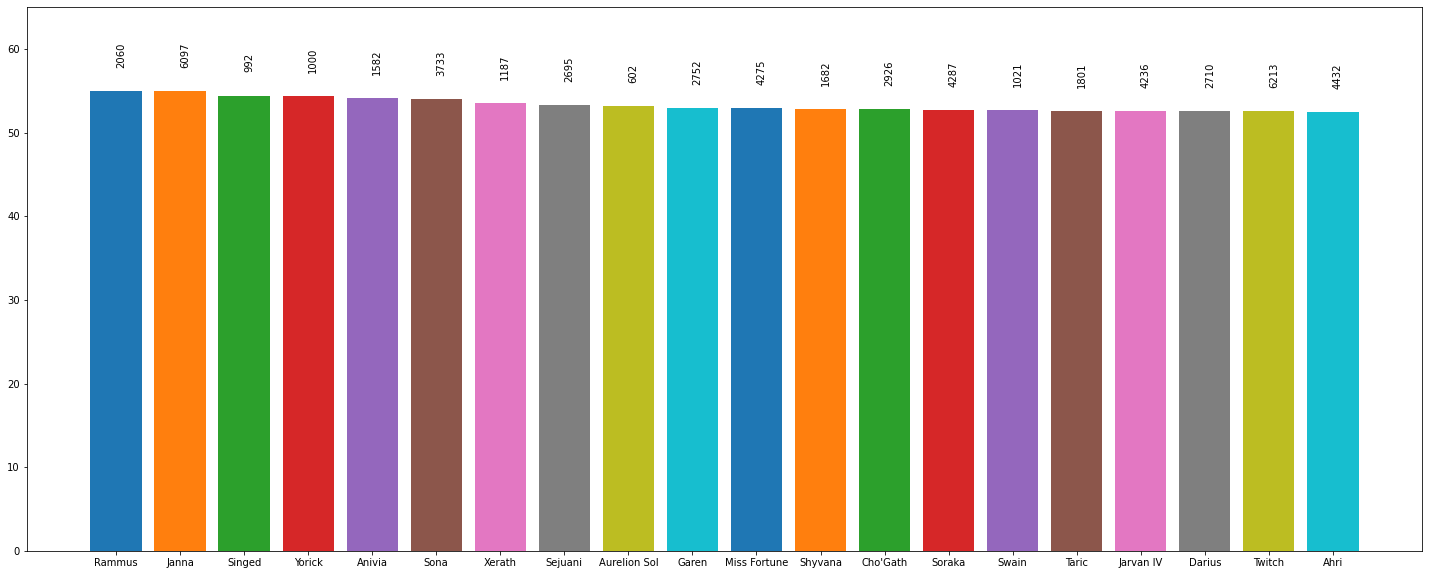

In [67]:
#Visualizing the win rates of top 20 champions

fig,ax = plt.subplots(figsize=(25,10))
plt.ylim(0,65)
plt.xticks(np.arange(0, 20, step=1))
for i in range(20):
    champ_id = int(sorted_champs_win[i][0])
    #plot the ith value with the x-axis being the champion, y is the win % and annotate the picked
    ax.bar(champion_names[champ_id],sorted_champs_win[i][1]['won'])
    #ax.annotate(sorted_champs_win[i][1]['picked'],xy=(sorted_champs_win[i][0],sorted_champs_win[i][1]['won']))
    ax.text(champion_names[champ_id],(sorted_champs_win[i][1]['won'] + 3),sorted_champs_win[i][1]['picked'],rotation=90)
    #replace the number with the champion name from the list of champions

Many of the champions don’t have a high pick rate besides Janna and Twitch. This suggests that the people who picked these champions might specialize in them. This provides the individual players with an edge because they have a mastery of a champion that is not used very often.

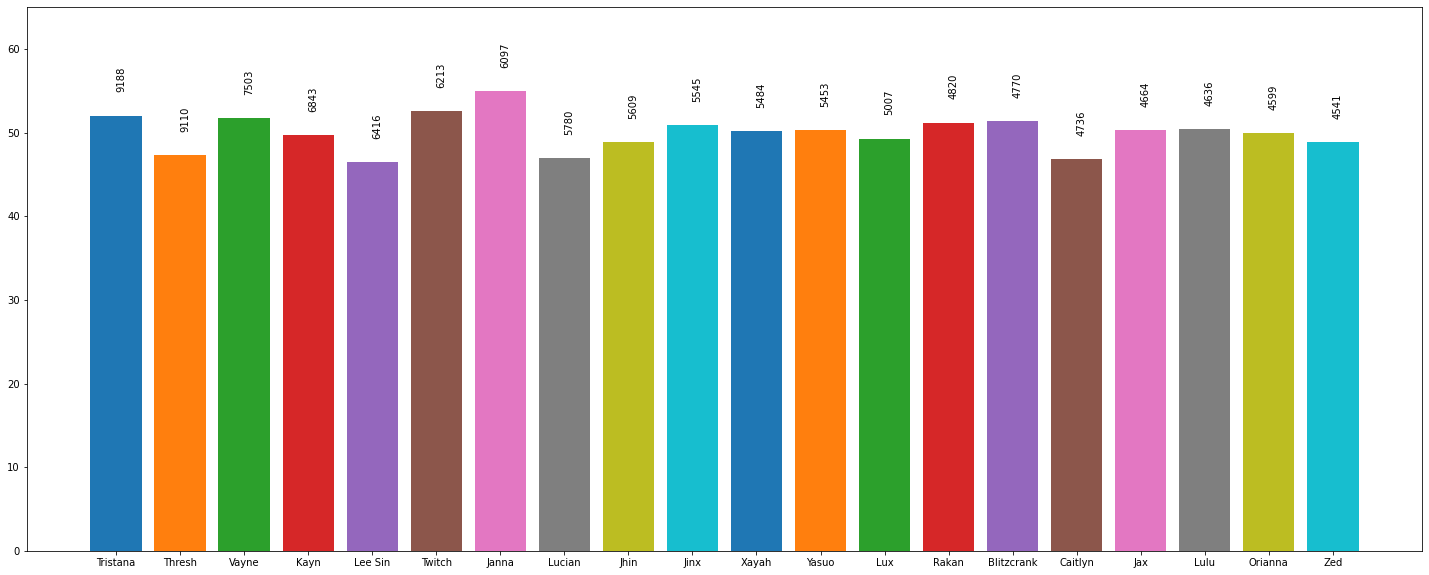

In [68]:
#visualizing the win rates of most picked champions
fig,ax = plt.subplots(figsize=(25,10))
plt.ylim(0,65)
plt.xticks(np.arange(0, 20, step=1))
for i in range(20):
    champ_id = int(sorted_champs_picked[i][0])
    #plot the ith value with the x-axis being the champion, y is the win % and annotate the picked
    ax.bar(champion_names[champ_id],sorted_champs_picked[i][1]['won'])
    
    #ax.annotate(sorted_champs_win[i][1]['picked'],xy=(sorted_champs_win[i][0],sorted_champs_win[i][1]['won']))
    ax.text(champion_names[champ_id],(sorted_champs_picked[i][1]['won'] + 3),sorted_champs_picked[i][1]['picked'],rotation=90)
    

It is observed that the most picked champions are in the role ADC(Attack Damage Carry) because they’re usually fun to play and are important toward carrying games. 

In [71]:
games_full.drop(columns=['gameId','creationTime','seasonId'],inplace=True)

In [72]:
corr =games_full.corr()

In [73]:
corr

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
gameDuration,1.000000,0.024187,0.105022,0.216842,0.379996,0.487788,0.255563,0.011690,0.000607,-0.002973,...,0.396769,0.319451,0.429793,0.416995,0.007818,0.004853,-0.001518,0.009548,0.009976,0.008206
winner,0.024187,1.000000,0.174770,0.375697,0.536437,0.261888,0.310386,0.119813,0.019132,0.000519,...,0.785813,0.660452,0.399249,0.497206,0.226102,-0.003714,0.000322,0.000046,-0.003010,-0.002691
firstBlood,0.105022,0.174770,1.000000,0.263866,0.169761,0.077293,0.189092,0.084062,0.004885,0.000699,...,0.223657,0.151111,0.076395,0.161045,0.122195,0.005265,-0.003818,0.004698,0.001483,0.005577
firstTower,0.216842,0.375697,0.263866,1.000000,0.380326,0.165028,0.403552,0.185989,0.005394,-0.008436,...,0.511296,0.347641,0.161308,0.364361,0.274713,-0.003668,-0.005956,0.002348,0.000878,-0.001758
firstInhibitor,0.379996,0.536437,0.169761,0.380326,1.000000,0.417848,0.352760,0.166521,0.004425,-0.011808,...,0.755335,0.699832,0.400133,0.487373,0.211380,-0.004185,-0.011025,-0.007650,-0.008131,-0.002049
firstBaron,0.487788,0.261888,0.077293,0.165028,0.417848,1.000000,0.201065,0.120714,0.009642,-0.009815,...,0.460115,0.385864,0.793114,0.393952,0.121126,-0.008986,-0.012893,-0.008572,-0.005207,-0.007266
firstDragon,0.255563,0.310386,0.189092,0.403552,0.352760,0.201065,1.000000,0.159429,-0.003235,-0.005986,...,0.427092,0.299977,0.195352,0.629794,0.205444,-0.000779,-0.007619,-0.004045,0.002753,0.000162
firstRiftHerald,0.011690,0.119813,0.084062,0.185989,0.166521,0.120714,0.159429,1.000000,-0.003121,-0.009917,...,0.188240,0.141677,0.101231,0.150173,0.866779,0.001247,-0.010029,-0.008588,-0.009826,-0.004224
t1_champ1id,0.000607,0.019132,0.004885,0.005394,0.004425,0.009642,-0.003235,-0.003121,1.000000,-0.052492,...,0.014693,0.006122,0.009844,-0.001838,0.003255,-0.012999,-0.018180,-0.006068,-0.015866,-0.006765
t1_champ1_sum1,-0.002973,0.000519,0.000699,-0.008436,-0.011808,-0.009815,-0.005986,-0.009917,-0.052492,1.000000,...,-0.001398,-0.001612,-0.007154,-0.002552,-0.005341,0.003986,0.006030,0.004057,-0.005801,0.002071


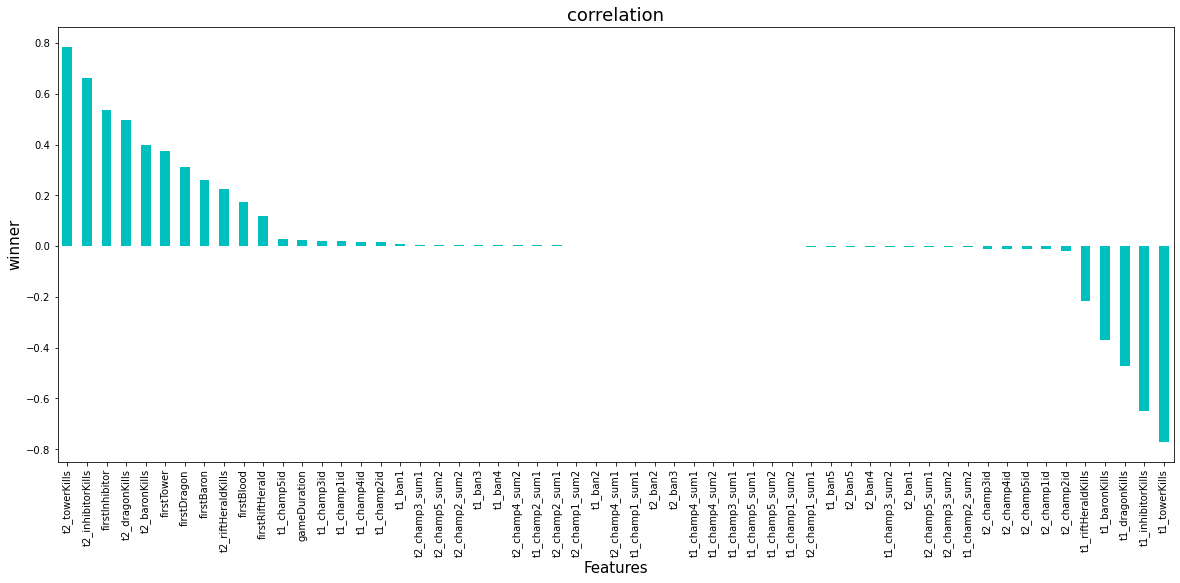

In [75]:
plt.figure(figsize = (20,8))
games_full.corr()['winner'].sort_values(ascending = False).drop(['winner']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('winner',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

##### From the Above Graphs the following observations are made:

In League of Legends global objectives are extremely important. They increase the chances of winning by providing buffs or gold to the entire team. 
Team 1 and 2 won 80% of the games that they took the first inhibitor and 70% of the games when they took the first tower.

The champions that a person picks is also important. The highest win rates are among champions that were not picked often. This could be due to specific people playing these lesser known champions and showing mastery within that role. This could throw the enemy team off because they don’t commonly encounter certain champions.

In contrast, the champions that were picked the most had fluctuating win rates. These champions are picked the most because they are currently strong in team compositions. However, because they are picked at a high rate it will be easier for the enemy team to understand how to counter certain champions.

Features relating to towerkills, inhibitors,baron kills,rift herald kills have the highest correlation with Target variable (winner)

### Building Machine Learning Models for Match winner Prediction

### Feature Selection

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
X = games_full.drop(columns = ['winner'])
y = games_full['winner']

In [79]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

### Checking for Multicollinearity using Variance Inflation Factor

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
vif = pd.DataFrame()

In [82]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [83]:
vif

,Features,vif
0,gameDuration,5.177708
1,firstBlood,1.098630
2,firstTower,1.581462
3,firstInhibitor,2.793347
4,firstBaron,3.823133
5,firstDragon,1.908832
6,firstRiftHerald,inf
7,t1_champ1id,1.018866
8,t1_champ1_sum1,1.354838
9,t1_champ1_sum2,1.360477


### Principle Component Analysis

In [86]:
from sklearn.decomposition import PCA

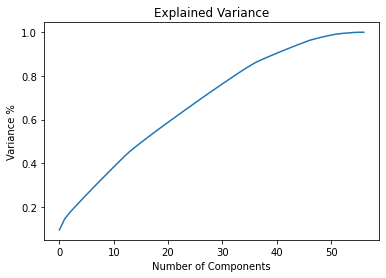

In [87]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

55 components explain around 95% variance in Data

### Selecting Kbest Features

In [88]:
from sklearn.feature_selection import SelectKBest, f_classif

In [89]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [90]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(60,'Score'))

               Feature         Score
47       t2_towerKills  83121.654422
22       t1_towerKills  75729.435053
48   t2_inhibitorKills  39834.681652
23   t1_inhibitorKills  37549.604170
3       firstInhibitor  20802.707271
50      t2_dragonKills  16908.612958
25      t1_dragonKills  14797.581972
49       t2_baronKills   9763.453044
2           firstTower   8461.787669
24       t1_baronKills   8139.777481
5          firstDragon   5489.132085
4           firstBaron   3791.338175
51  t2_riftHeraldKills   2773.989513
26  t1_riftHeraldKills   2570.640670
1           firstBlood   1622.236578
6      firstRiftHerald    749.882900
19         t1_champ5id     35.932333
0         gameDuration     30.138497
13         t1_champ3id     20.632660
7          t1_champ1id     18.853923
35         t2_champ2id     16.638574
16         t1_champ4id     15.300743
10         t1_champ2id     13.479182
32         t2_champ1id      9.180693
44         t2_champ5id      7.454534
41         t2_champ4id      7.032069
3

#### Selecting best features based on their scores:

In [91]:
x_best = X.drop(columns=['t1_champ5_sum1','t1_ban2','t2_champ4_sum1','t1_champ3_sum1','t1_champ1_sum1','t2_ban2','t1_champ4_sum2','t2_ban3','t1_champ4_sum1','t2_champ4_sum2','t2_ban5','t1_champ2_sum1','t1_ban5','t2_champ2_sum1','t2_champ1_sum2','t2_champ1_sum1','t1_champ1_sum2','t1_champ5_sum2','t1_ban1','t2_champ3_sum1','gameDuration','t1_champ4_sum1','t2_ban3','t1_champ4_sum2','t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id','t2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id','t2_champ5_sum2','t1_champ2_sum2','t2_champ3_sum2','t2_champ5_sum1','t2_champ2_sum2','t2_ban1','t1_ban3','t1_champ3_sum2','t1_ban4','t2_ban4']).copy()

In [92]:
scaled_x_best = scaler.fit_transform(x_best)

#### Analyzing the Target Classes

<AxesSubplot:xlabel='winner', ylabel='count'>

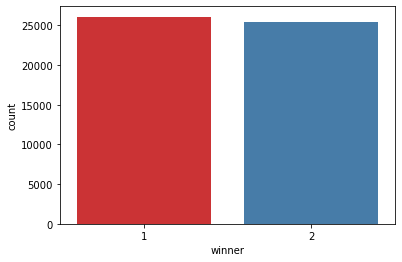

In [94]:
sns.countplot(games_full['winner'], palette="Set1")

The classes are fairly balanced

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, random_state = i)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc

In [96]:
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9738754542037339 on random_state: 0


In [98]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, random_state =  0)

In [99]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [101]:
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
XGBC= XGBClassifier()
adbc = AdaBoostClassifier()
LOGR= LogisticRegression(solver='liblinear')
SV =  SVC()
KNN = KNeighborsClassifier()

### Training the Models

In [102]:
RFC.fit(x_train,y_train.ravel())
XGBC.fit(x_train,y_train.ravel())
DTC.fit(x_train,y_train)
adbc.fit(x_train,y_train.ravel())
SV.fit(x_train,y_train.ravel())
LOGR.fit(x_train,y_train.ravel())
KNN.fit(x_train,y_train.ravel())

[03:52:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KNeighborsClassifier()

All Models have been trained.

### Logistic Regression Model Accuracy

In [103]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)


In [104]:
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[7570,  411],
       [ 206, 7775]], dtype=int64)

In [105]:
print(accu)

              precision    recall  f1-score   support

           1       0.97      0.95      0.96      7981
           2       0.95      0.97      0.96      7981

    accuracy                           0.96     15962
   macro avg       0.96      0.96      0.96     15962
weighted avg       0.96      0.96      0.96     15962



### Random Forest Classifier Model Accuracy

In [106]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)

In [107]:
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[7771,  210],
       [ 267, 7714]], dtype=int64)

In [108]:
print(accu)

              precision    recall  f1-score   support

           1       0.97      0.97      0.97      7981
           2       0.97      0.97      0.97      7981

    accuracy                           0.97     15962
   macro avg       0.97      0.97      0.97     15962
weighted avg       0.97      0.97      0.97     15962



### Decision Tree Classifier Model Accuracy

In [109]:
DTCpred = DTC.predict(x_test)
accu = classification_report(y_test,DTCpred)

In [110]:
conf_matrx = confusion_matrix(y_test,DTCpred)

In [111]:
conf_matrx

array([[7702,  279],
       [ 331, 7650]], dtype=int64)

In [112]:
print(accu)

              precision    recall  f1-score   support

           1       0.96      0.97      0.96      7981
           2       0.96      0.96      0.96      7981

    accuracy                           0.96     15962
   macro avg       0.96      0.96      0.96     15962
weighted avg       0.96      0.96      0.96     15962



### XGB Classifier Model Accuracy

In [113]:
XGBCpred = XGBC.predict(x_test)
accu = classification_report(y_test,XGBCpred)

In [114]:
conf_matrx = confusion_matrix(y_test,XGBCpred)
conf_matrx

array([[7770,  211],
       [ 262, 7719]], dtype=int64)

In [115]:
print(accu)

              precision    recall  f1-score   support

           1       0.97      0.97      0.97      7981
           2       0.97      0.97      0.97      7981

    accuracy                           0.97     15962
   macro avg       0.97      0.97      0.97     15962
weighted avg       0.97      0.97      0.97     15962



### AdaBoost Classifier Model Accuracy

In [116]:
adbcpred = adbc.predict(x_test)
accu = classification_report(y_test,adbcpred)

In [117]:
conf_matrx = confusion_matrix(y_test,adbcpred)
conf_matrx

array([[7789,  192],
       [ 322, 7659]], dtype=int64)

In [118]:
print(accu)

              precision    recall  f1-score   support

           1       0.96      0.98      0.97      7981
           2       0.98      0.96      0.97      7981

    accuracy                           0.97     15962
   macro avg       0.97      0.97      0.97     15962
weighted avg       0.97      0.97      0.97     15962



### SV Classifier Model Accuracy

In [119]:
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)
conf_matrx = confusion_matrix(y_test,SVpred)
conf_matrx


array([[7769,  212],
       [ 278, 7703]], dtype=int64)

In [120]:
print(accu)

              precision    recall  f1-score   support

           1       0.97      0.97      0.97      7981
           2       0.97      0.97      0.97      7981

    accuracy                           0.97     15962
   macro avg       0.97      0.97      0.97     15962
weighted avg       0.97      0.97      0.97     15962



### K Nearest Neighbours Classifier Model Accuracy

In [121]:
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)



In [122]:
conf_matrx = confusion_matrix(y_test,KNNpred)
conf_matrx

array([[7594,  387],
       [ 300, 7681]], dtype=int64)

In [123]:
print(accu)

              precision    recall  f1-score   support

           1       0.96      0.95      0.96      7981
           2       0.95      0.96      0.96      7981

    accuracy                           0.96     15962
   macro avg       0.96      0.96      0.96     15962
weighted avg       0.96      0.96      0.96     15962



### Model Cross Validation

In [127]:
from sklearn.model_selection import cross_val_score as cvs

#### Decision Tree Classifier

In [128]:
print(cvs(DTC,scaled_x_best,y,cv=5).mean())

0.9631967372305302


#### Logistic Regression

In [129]:
print(cvs(LOGR,scaled_x_best,y,cv=5).mean()) 

0.9607885026218683


#### Random Forest Classifier

In [130]:
print(cvs(RFC,scaled_x_best,y,cv=5).mean())

0.9711788696834336


#### XGB Classifier

In [131]:
print(cvs(XGBC,scaled_x_best,y,cv=5).mean())

[03:55:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:55:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:55:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:55:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

#### Adaboost Classifier

In [132]:
print(cvs(adbc,scaled_x_best,y,cv=5).mean())

0.9654107593707517


#### SV Classifier

In [133]:
print(cvs(SV,scaled_x_best,y,cv=5).mean())

0.9705573897844241


#### K Nearest Neighbours Classifier

In [134]:
print(cvs(KNN,scaled_x_best,y,cv=5).mean())

0.9564381433288016


### ROC AUC Scores

#### Logistic Regression

In [136]:
roc_auc_score(y_test,LOGRpred)

0.9613456960280666

#### SV Classifier

In [137]:
roc_auc_score(y_test,SVpred)

0.9693020924696153

#### Adaboost Classifier

In [138]:
roc_auc_score(y_test,adbcpred)

0.9677985214885353

#### XGB Classifier

In [139]:
roc_auc_score(y_test,XGBCpred)

0.9703671219145471

#### Random Forest Classifier

In [140]:
roc_auc_score(y_test,RFCpred)

0.9701165267510335

#### K Nearest Neighbours Classifier

In [141]:
roc_auc_score(y_test,KNNpred)

0.9569602806665831

### ROC AUC curves 

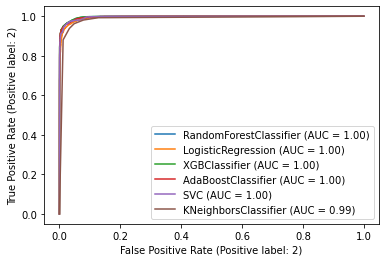

In [142]:
disp = plot_roc_curve(RFC,x_test,y_test)
mod = [LOGR,XGBC,adbc,SV,KNN]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

### Based on the above graph and roc_auc_scores,XGB Classifier is the best model for the dataset, with AUC = 1.00 and roc_auc_score = 0.970367

### Based on comparing Accuracy Score results, with Cross Validation results, it is determined that XGB Classifier is the best model.

### Hyper Parameter Tuning

#### XGB Classifier

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
parameter = {'booster':["gbtree","gblinear"],'eta': [0.01,0.1,0.2,0.3],'min_child_weight':np.arange(5),'max_depth':[10,20,40,60,80],'subsample':[0.5,1]}

In [146]:
GridCV = GridSearchCV(XGBClassifier(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [148]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[04:15:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [149]:
GridCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'max_depth': 10,
 'min_child_weight': 4,
 'subsample': 0.5}

In [150]:
Best_mod1 = XGBClassifier(booster = 'gbtree',eta = 0.1, max_depth= 10, min_child_weight = 4,subsample = 0.5)
Best_mod1.fit(x_train,y_train)

[04:18:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=10,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [151]:
xgbpred = Best_mod1.predict(x_test)
acc = accuracy_score(y_test,xgbpred)
print(acc*100)

97.11189074050871


##### XGB Classifier has an accuracy of 97.11%

In [152]:
conf_matrx = confusion_matrix(y_test,xgbpred)
conf_matrx

array([[7784,  197],
       [ 264, 7717]], dtype=int64)

#### Saving The Model

In [ ]:
import joblib
joblib.dump(Best_mod1,"BestModelLoLPred.pkl")

#### Loading The Model

In [154]:
mod=joblib.load("BestModelLoLPred.pkl")

In [155]:
print(mod.predict(x_test))

[1 2 1 ... 2 1 2]


In [156]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y_test})
Prediction_accuracy.head(50)

,Predictions,Actual Values
31836,1,1
13949,2,2
19393,1,1
48603,2,2
18450,1,1
18012,1,1
36040,2,2
8641,1,1
22497,1,1
24886,1,1
